In [2]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
import sklearn.cross_validation

In [24]:
boston = load_boston()
print(boston.data.shape)
print(boston.target.shape)

(506, 13)
(506,)


In [4]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [74]:
X = boston.data
Y = boston.target
print(X)
print("--"*50)
print(Y)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
----------------------------------------------------------------------------------------------------
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.

In [75]:
df=pd.DataFrame(X)
X=df.as_matrix()
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [76]:
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, Y, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


In [77]:
scaler  = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [78]:
df_train=pd.DataFrame(X_train)
df_train['PRICE']=Y_train

df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,PRICE
0,-0.334330,-0.499618,1.069608,-0.251124,1.645428,0.233772,0.969882,-0.900522,1.654486,1.538813,0.810913,-3.463820,1.611369,11.8
1,0.478536,-0.499618,1.069608,-0.251124,1.113435,-0.149715,0.383159,-0.926152,1.654486,1.538813,0.810913,-2.872888,1.265636,11.0
2,0.277128,-0.499618,1.069608,-0.251124,-0.168580,0.653301,0.270733,-0.241993,1.654486,1.538813,0.810913,0.389957,-0.671032,23.7
3,-0.414300,3.445319,-1.442682,-0.251124,-1.293614,1.372699,-1.591321,2.387078,-0.527917,-1.061095,-0.265106,0.421447,-1.082820,35.4
4,-0.397576,-0.499618,2.504352,-0.251124,0.502952,-1.215116,0.896102,-0.982361,-0.642780,1.804713,0.764129,0.412198,0.779361,15.2


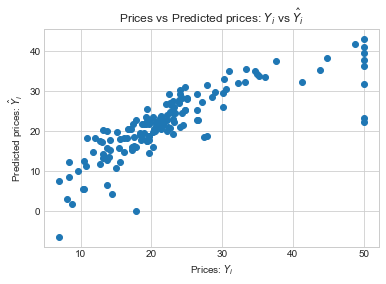

In [79]:
# code source:https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

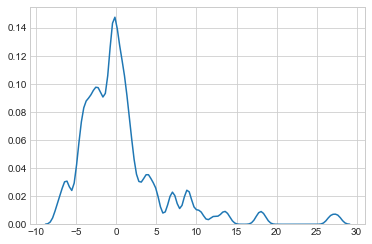

In [80]:
delta_y = Y_test - Y_pred;

sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()


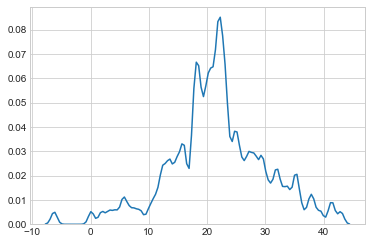

In [81]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(Y_pred), bw=0.5)
plt.show()

In [82]:
#SGD implementation for linear regression

W,B,iteration,rate,k = np.zeros(shape=(1,13)),0,700,0.1,25 #intialise W and B to zero


while iteration>=0 :
    w,b,delta_w,delta_b = W,B,np.zeros(shape=(1,13)),0
    data = df_train.sample(25)                #sampling random k=batch size=20 data
    x = np.array(data.drop('PRICE',axis=1))
    y = np.array(data['PRICE'])
    
    for i in range(25):
        delta_w += (-2)*x[i]*(y[i]-(np.dot(w,x[i])+b))   #partial differentiation wrt w 
        delta_b += (-2)*(y[i]-(np.dot(w,x[i])+b))        #partial differentiation wrt b 
        
    W=(w-rate*(delta_w)/k)
    B=(b-rate*(delta_b)/k)
    
    rate = rate/1.01
    iteration-=1
    
    
print(W)
print(B)       


[[-1.2487875   0.87689079 -0.45965487  0.20235369 -1.42100563  2.61437601
  -0.22784103 -2.70649964  2.22489369 -1.38188117 -2.10348261  1.15048756
  -3.46084742]]
[22.50079696]


In [83]:
#prediction on x_test
#https://www.geeksforgeeks.org/numpy-asscalar-in-python/
y_predic=[]
for i in range(len(X_test)):
    val=np.dot(W,X_test[i])+B  #val= wTx+b
    y_predic.append(np.asscalar(val))

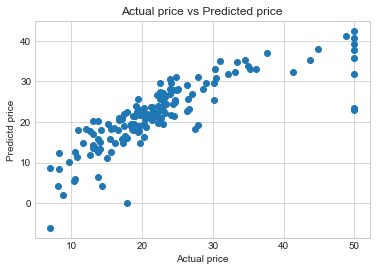

In [84]:
#Scatter plot of actual price vs predicted price

plt.scatter(Y_test,y_predic)
plt.xlabel('Actual price')
plt.ylabel('Predictd price')
plt.title('Actual price vs Predicted price')
plt.show()


In [85]:
MSE_lr=mean_squared_error(Y_test,y_predic)
print('mean squared error =',MSE_lr)

mean squared error = 30.78503402128002


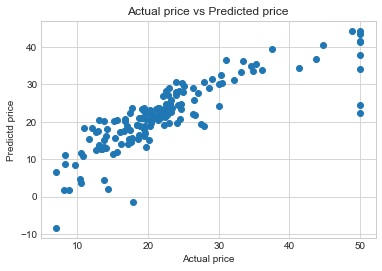

In [86]:
#SGD regression sklearn implementation

model=SGDRegressor(learning_rate='constant',eta0=0.01,penalty=None,n_iter=100,max_iter=100)
model.fit(X_train,Y_train)
Y_pred_sgd=model.predict(X_test)

#Scatter plot of actual price vs predicted price

plt.scatter(Y_test,Y_pred_sgd)
plt.xlabel('Actual price')
plt.ylabel('Predictd price')
plt.title('Actual price vs Predicted price')
plt.show()


In [89]:
MSE_sgd=mean_squared_error(Y_test,Y_pred_sgd)
print('mean squared error =',MSE_sgd)

mean squared error = 29.958075584142815


In [88]:
#Comparison between weights obtained from own implementation and weights obtained from sgd implementation
from prettytable import PrettyTable    
x = PrettyTable()
x.field_names=['Weight vector manual','Weight vector SGD sklearn']
weight_sgd=model.coef_
for i in range(13):
    x.add_row([W[0][i],weight_sgd[i]])
print(x)


+----------------------+---------------------------+
| Weight vector manual | Weight vector SGD sklearn |
+----------------------+---------------------------+
| -1.2487875005565663  |     -1.367634066486797    |
|  0.8768907910707392  |     0.6232126548856614    |
| -0.45965487392711285 |   -0.034321602974485256   |
| 0.20235368792480632  |    0.40482018147864196    |
| -1.4210056337505508  |    -1.4762829533157247    |
|  2.6143760112285666  |     3.3679058605944086    |
| -0.22784103355767868 |    -0.22049142711468647   |
| -2.7064996405269692  |     -3.008014875734558    |
|  2.2248936947136384  |     2.912155404513144     |
| -1.3818811742142798  |    -2.1673612468913763    |
| -2.1034826093058006  |    -2.3343970840414117    |
|  1.1504875571567152  |     0.9213535450650273    |
| -3.4608474150234865  |    -3.7125274213122017    |
+----------------------+---------------------------+


### Conclusions

Weight vectors and MSE values are almost same in Custom SGD implementation and Sklearn implementation